In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import glob

In [337]:
ls -hrtl /UserData/maddalena/sacla2022/05-processed_I/

total 25M
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192421.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192422.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192423.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192424.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192425.npz*
-rwxrwxrwx 1 girelli   girelli   5.5K Oct 29 20:56 water_1192426.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 01:54 water_1192428.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 02:25 water_1192455.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 03:06 water_1192459.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 03:14 water_1192461.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 03:25 water_1192462.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 03:35 water_1192464.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 03:35 water_1192465.npz*
-rwxrwxrwx 1 maddalena maddalena 5.5K Oct 30 04:15 water_1192467.npz*
-rwxrwxrwx

In [102]:
path='/UserData/maddalena/sacla2022/05-processed_I/'

(0.5, 1.5)

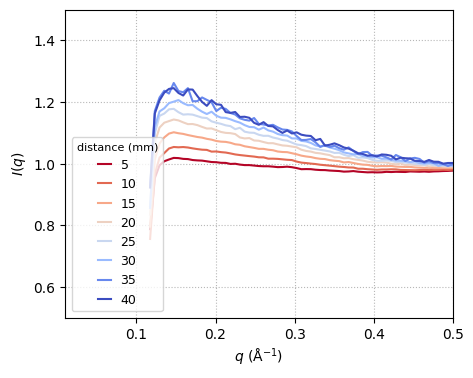

In [103]:
runs = [1192430, 1192434, 1192437, 1192442, 1192446, 1192451, 1192463, 1192473]
posz = [5,10,15,20,25,30,35,40]

col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))
plt.figure(figsize=(5,4))
i_norm=np.zeros(len(runs))
for i,run in enumerate(runs):
    file=np.load(f'{path}water_{run}.npz',allow_pickle=True)
    plt.plot(file['q'][3:-3], file['I'][3:-3]/(np.mean(file['I'][(file['q']<0.7)&(file['q']>.5)])), c=col[i], label=str(np.round(posz[i],1)))
    # print(file['I'][3:-3])
    i_norm[i]=np.mean(file['I'][3:8]/(np.mean(file['I'][(file['q']<0.7)&(file['q']>.5)])))
plt.xlim(file['q'][3], file['q'][-3])
plt.grid(ls=':',alpha=.9)
legend=plt.legend(title='distance (mm)', handlelength=1, fontsize=9)
plt.setp(legend.get_title(),fontsize=8)
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$') 
plt.xlim(0.01,.5)
plt.ylim(0.5,1.5)




Text(0, 0.5, '$I(q=0.1 \\AA)$')

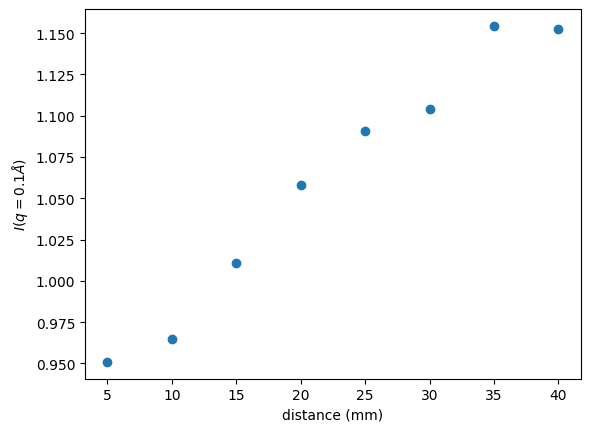

In [104]:
plt.figure()
plt.plot(posz,i_norm,'o',ls='')
plt.xlabel('distance (mm)')
plt.ylabel(r'$I(q=0.1 \AA)$')


# Fit the shit

In [207]:
from scipy.optimize import curve_fit

def fit(function,x,y,p0=None,sigma=None,bounds=[None,None]):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma,bounds=bounds)
    xc = np.linspace(min(x),max(x),len(x))
    curve = function(xc,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,xc,curve,perr

def gaussian(x, a, x0, sigma, d):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

Text(0.5, 0, 'distance (mm)')

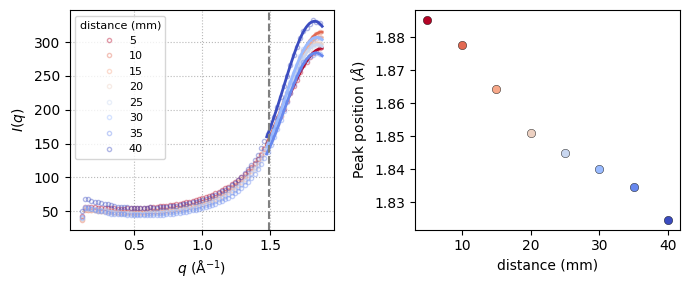

In [106]:
# runs = [1192428, 1192430, 1192433, 1192437, 1192442, 1192446, 1192450]
# posz = [0.7,5,10,15,20,25,30]

col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))
fig, (a1,a2) = plt.subplots(1,2,figsize=(7,3), tight_layout=True)
xmin, xmax = 230, -1

for i,run in enumerate(runs):
    file=np.load(f'{path}water_{run}.npz')
    a1.plot(file['q'][3:-3:4], file['I'][3:-3:4], c=col[i], ls='',marker='o', ms=3, alpha=.4, fillstyle='none',
             label=f'{posz[i]:d}')
    popt,xc,curve,perr = fit(gaussian, file['q'][xmin:xmax], file['I'][xmin:xmax], p0=[350,1.8,.3, 50])
    a1.plot(xc, curve, c=col[i], lw=2)
    a2.plot(posz[i], popt[1], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    # a3.plot(posz[i], popt[2], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    # print(file['I'][3:-3])
a1.axvline(x=file['q'][3:-3][xmin], ls='--', c='gray')

a1.grid(ls=':',alpha=.9)
legend=a1.legend(title='distance (mm)', fontsize=8)
plt.setp(legend.get_title(),fontsize=8)
# plt.xlim(file['q'][3], file['q'][-3])
a1.set_ylabel(r'$I(q)$')
a1.set_xlabel(r'$q$ $\rm (\AA^{-1})$')
a2.set_ylabel(r'Peak position ($\AA$)')
a2.set_xlabel('distance (mm)')
# a3.set_ylabel('sigma')
# a3.set_xlabel('distance (mm)')

# Testing shit

### Only posz=35mm

Text(0.5, 1.0, 'z=35 mm')

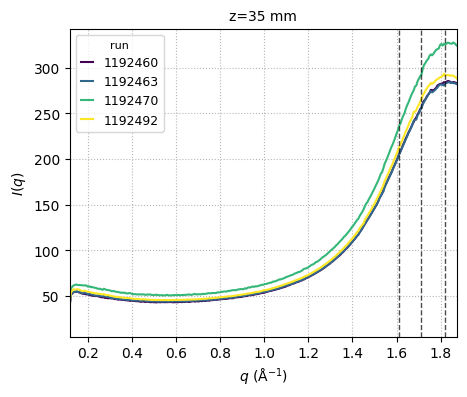

In [107]:
runs =[1192460,1192463,1192470,1192492]
plt.figure(figsize=(5,4))
col = plt.cm.viridis(np.linspace(0,1,len(runs)))

for i in range(len(runs)):
    file = np.load(f'{path}water_{runs[i]}.npz')
    plt.plot(file['q'], file['I'], c=col[i], label=runs[i])
    
for ref in [1.6129, 1.71, 1.82]:
    plt.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)

plt.xlim(file['q'][3], file['q'][-3])
plt.grid(ls=':',alpha=.9)
legend=plt.legend(title='run', handlelength=1, fontsize=9)
plt.setp(legend.get_title(),fontsize=8)
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$') 
plt.title('z=35 mm', fontsize=10)

### Only posz=40mm

Text(0.5, 1.0, 'z=40 mm')

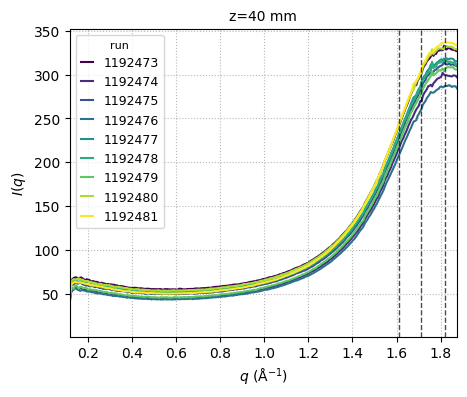

In [108]:
runs = [1192473,1192474,1192475,1192476,1192477,1192478,1192479,1192480,1192481] # 40
plt.figure(figsize=(5,4))
col = plt.cm.viridis(np.linspace(0,1,len(runs)))

for i in range(len(runs)):
    file = np.load(f'{path}water_{runs[i]}.npz')
    plt.plot(file['q'], file['I'], c=col[i], label=runs[i])
    
for ref in [1.6129, 1.71, 1.82]:
    plt.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)

plt.xlim(file['q'][3], file['q'][-3])
plt.grid(ls=':',alpha=.9)
legend=plt.legend(title='run', handlelength=1, fontsize=9)
plt.setp(legend.get_title(),fontsize=8)
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$') 
plt.title('z=40 mm', fontsize=10)

### Only posz=50mm droplet size 2

Text(0.5, 1.0, 'z=65 mm')

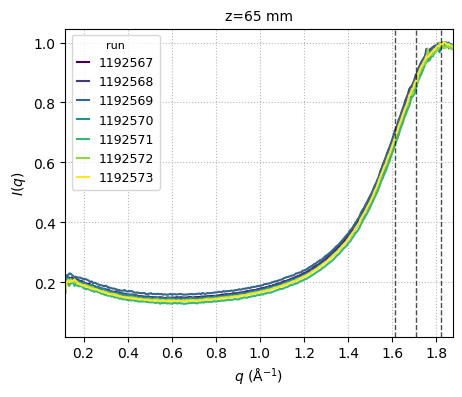

In [430]:
runs =  [1192567,1192568,1192569,1192570,1192571,1192572,1192573]#[1192527,1192528,1192529,1192530,1192532,] # 40
plt.figure(figsize=(5,4))
col = plt.cm.viridis(np.linspace(0,1,len(runs)))

for i in range(len(runs)):
    file = np.load(f'{path}water_{runs[i]}.npz')
    plt.plot(file['q'], file['I']/max( file['I']), c=col[i], label=runs[i])
    
for ref in [1.6129, 1.71, 1.82]:
    plt.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)

plt.xlim(file['q'][3], file['q'][-3])
plt.grid(ls=':',alpha=.9)
legend=plt.legend(title='run', handlelength=1, fontsize=9)
plt.setp(legend.get_title(),fontsize=8)
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$') 
plt.title('z=65 mm', fontsize=10)

# All temps

In [192]:
# these are the runs with one droplet size
runs = [[1192430,1192431], # 5
        [1192433,1192434,1192435], # 10
        [1192437,1192438,1192439,1192440], # 15 
        [1192442,1192443,1192444], #20
        [1192446,1192447,1192448], # 25
        [1192450,1192451,1192452,1192453,1192454,1192496,1192497,1192498,1192499], # 30
        #[1192492],
        [1192460,1192463,1192470,1192492], #35
        [1192473,1192474,1192475,1192476,1192477,1192478,1192479,1192480,1192481], # 40
       ] 


posz = [5,10,15,20,25,30,35,40]
print(len(runs), len(posz))

8 8


In [403]:
# these are the runs with another droplet size
runs = [[1192503,1192504], # 5
        [1192506,1192507,1192508], # 15
        [1192510,1192511,1192512], # 26  
        [1192514,1192515,1192516,1192517,1192518], # 35  
        [1192520,1192521,1192522,1192523,1192524,1192525], # 45 
        [1192527,1192528,1192529,1192530,1192532,1192533],#50
        [1192536,1192539,1192541,1192542,1192543,1192544,1192545,1192546],#55 (1192537, 1192538,1192540 do not have anyhits)
        [1192558,1192559,1192560,1192561,1192562,1192563,1192564,], ##60
       ]


posz = [5,15,26,35,45,50,55,60]#,10,15,20,25,30,35,40]
print(len(runs), len(posz))

9 9


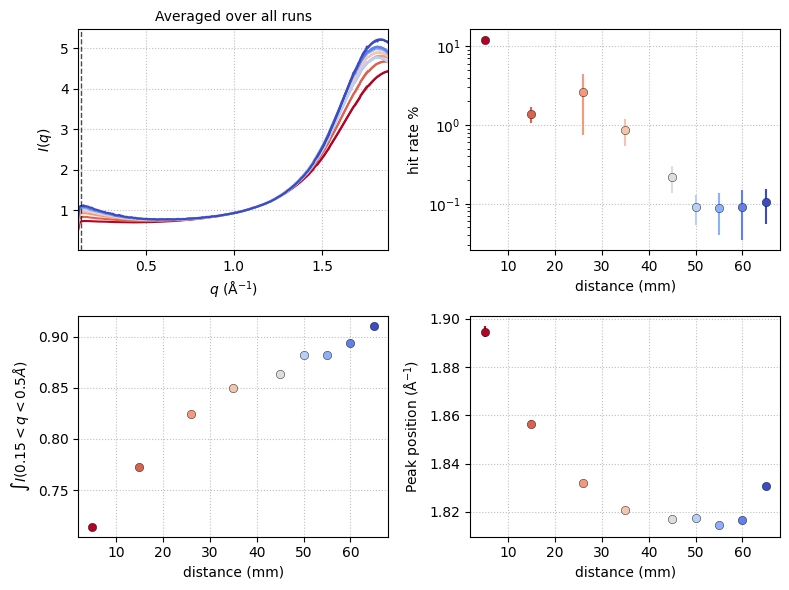

In [404]:
fig, ((a1,a2),(a3,a4)) = plt.subplots(2,2,figsize=(8,6), tight_layout=True)
col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))


dIqs = []
Iqs = []
qs = []
I_qs0=[]
i_norm=np.zeros(len(runs))
di_norm=np.zeros(len(runs))


for i in range(len(runs)):
    Iq_tmp = []
    tmp = []
    for j in range(len(runs[i])):
        file = np.load(f'{path}water_{runs[i][j]}.npz')
        Iq_tmp.append(file['I'])
        tmp.append(file['hit_rate']*100)
    qs.append(file['q'])
    Iqs.append(np.average(Iq_tmp, axis=0))
    dIqs.append(np.std(Iq_tmp, axis=0)/np.sqrt(np.size(Iq_tmp,0)))
    
    norm=(np.mean(Iqs[i][(file['q']>.9)&(file['q']<1.2)]))
    I_qs0= Iqs[i]/norm
    
    i_norm[i]=np.mean(I_qs0[10:68])
    di_norm[i]=np.sqrt(np.sum(np.array(dIqs[i][10:68])**2))/norm
    popt,xc,curve,perr = fit(gaussian, qs[i][xmin:xmax], Iqs[i][xmin:xmax]/norm, p0=[350,1.8,.3, 50])
    
    
    a1.plot(qs[i][:-1],I_qs0[:-1], c=col[i], label=posz[i],ls='-',fillstyle='none',ms=3,)
    a1.plot(qs[i][xmin:xmax],curve,c=col[i])
    
    a2.errorbar(posz[i], np.average(tmp, axis=0), np.std(tmp),marker='o',c=col[i], markeredgecolor='k', markeredgewidth=.3)
    
    a3.plot(posz[i],i_norm[i], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    
    a4.errorbar(posz[i], popt[1], perr[1], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    

    
#for ref in [1.6129, 1.71, 1.82]:
#    a1.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)    
a1.axvline(x=.13, ls='--', c='k', alpha=0.7, lw=1)    
        
a1.set_xlim(file['q'][3],file['q'][-3])
#a1.set_xlim(1.,file['q'][-3])

a1.grid(ls=':',alpha=.9)
#legend=a1.legend(handlelength=1, fontsize=9)
#legend.set_title('distance (mm)',prop={'size':9})
# a1.setp(legend.get_title(),fontsize=8)

a1.set_ylabel(r'$I(q)$')
a1.set_xlabel(r'$q$ $\rm (\AA^{-1})$') 
a1.set_title('Averaged over all runs', fontsize=10)
a1.grid(ls=':',alpha=.8)


a2.set_xlabel('distance (mm)')
a2.set_ylabel('hit rate %')
a2.set_yscale('log')
a2.grid(ls=':',alpha=.8)

a3.set_xlabel('distance (mm)')
a3.set_ylabel(r'$\int I(0.15<q<0.5 \AA)$')
a3.grid(ls=':',alpha=.8)

a4.set_ylabel(r'Peak position $\rm (\AA^{-1})$') 
a4.set_xlabel('distance (mm)')
a4.grid(ls=':',alpha=.8)


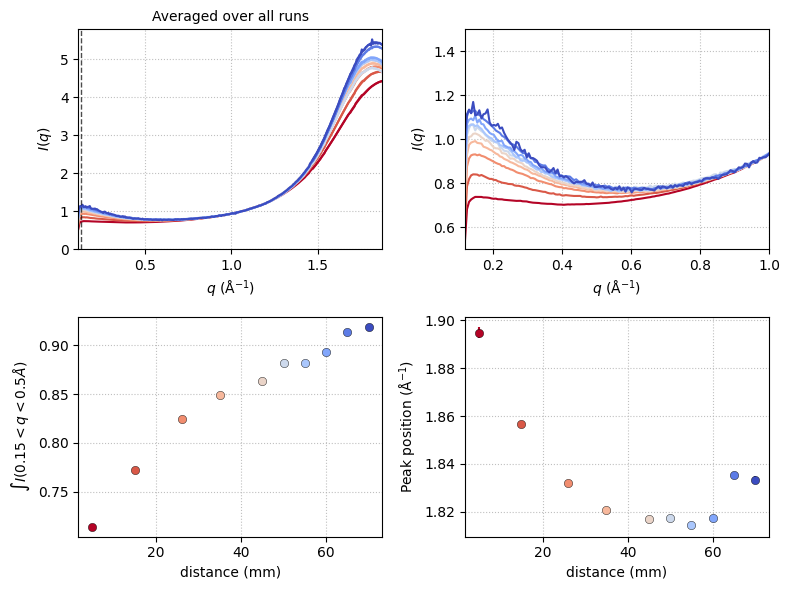

In [452]:
fig, ((a1,a2),(a3,a4)) = plt.subplots(2,2,figsize=(8,6), tight_layout=True)
col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))


dIqs = []
Iqs = []
qs = []
I_qs0=[]
i_norm=np.zeros(len(runs))
di_norm=np.zeros(len(runs))


for i in range(len(runs)):
    Iq_tmp = []
    tmp = []
    for j in range(len(runs[i])):
        file = np.load(f'{path}water_{runs[i][j]}.npz')
        Iq_tmp.append(file['I'])
        tmp.append(file['hit_rate']*100)
    qs.append(file['q'])
    Iqs.append(np.average(Iq_tmp, axis=0))
    dIqs.append(np.std(Iq_tmp, axis=0)/np.sqrt(np.size(Iq_tmp,0)))
    
    norm=(np.mean(Iqs[i][(file['q']>.9)&(file['q']<1.2)]))
    I_qs0= Iqs[i]/norm
    
    i_norm[i]=np.mean(I_qs0[10:68])
    di_norm[i]=np.sqrt(np.sum(np.array(dIqs[i][10:68])**2))/norm
    popt,xc,curve,perr = fit(gaussian, qs[i][xmin:xmax], Iqs[i][xmin:xmax]/norm, p0=[350,1.8,.3, 50])
    
    
    a1.plot(qs[i][:-1],I_qs0[:-1], c=col[i], label=posz[i],ls='-',fillstyle='none',ms=3,)
    a1.plot(qs[i][xmin:xmax],curve,c=col[i])
    
    #a2.errorbar(posz[i], np.average(tmp, axis=0), np.std(tmp),marker='o',c=col[i], markeredgecolor='k', markeredgewidth=.3)
    a2.plot(qs[i][:-1],I_qs0[:-1], c=col[i], label=posz[i],ls='-',fillstyle='none',ms=3,)
    
    a3.plot(posz[i],i_norm[i], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    
    a4.errorbar(posz[i], popt[1], perr[1], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    

    
#for ref in [1.6129, 1.71, 1.82]:
#    a1.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)    
a1.axvline(x=.13, ls='--', c='k', alpha=0.7, lw=1)    
        
a1.set_xlim(file['q'][3],file['q'][-3])
a2.set_xlim(file['q'][3],1)
a2.set_ylim(.5,1.5)
a1.grid(ls=':',alpha=.9)
#legend=a1.legend(handlelength=1, fontsize=9)
#legend.set_title('distance (mm)',prop={'size':9})
# a1.setp(legend.get_title(),fontsize=8)

a1.set_ylabel(r'$I(q)$')
a1.set_xlabel(r'$q$ $\rm (\AA^{-1})$') 
a1.set_title('Averaged over all runs', fontsize=10)
a1.grid(ls=':',alpha=.8)


a2.set_ylabel(r'$I(q)$')
a2.set_xlabel(r'$q$ $\rm (\AA^{-1})$') 
a2.grid(ls=':',alpha=.8)

a3.set_xlabel('distance (mm)')
a3.set_ylabel(r'$\int I(0.15<q<0.5 \AA)$')
a3.grid(ls=':',alpha=.8)

a4.set_ylabel(r'Peak position $\rm (\AA^{-1})$') 
a4.set_xlabel('distance (mm)')
a4.grid(ls=':',alpha=.8)


In [406]:
distance=[0.005,0.015, 0.02,  0.025, 0.03,  0.035, 0.04,  0.045, 0.05,  0.055, 0.06,0.0 ]*1000
T=[267.37,250.78969563, 246.71828963, 243.72530823, 241.5065641,  239.7588108, 238.26952011, 236.99110816, 235.89202105, 234.93547104, 234.08555584,233.3]

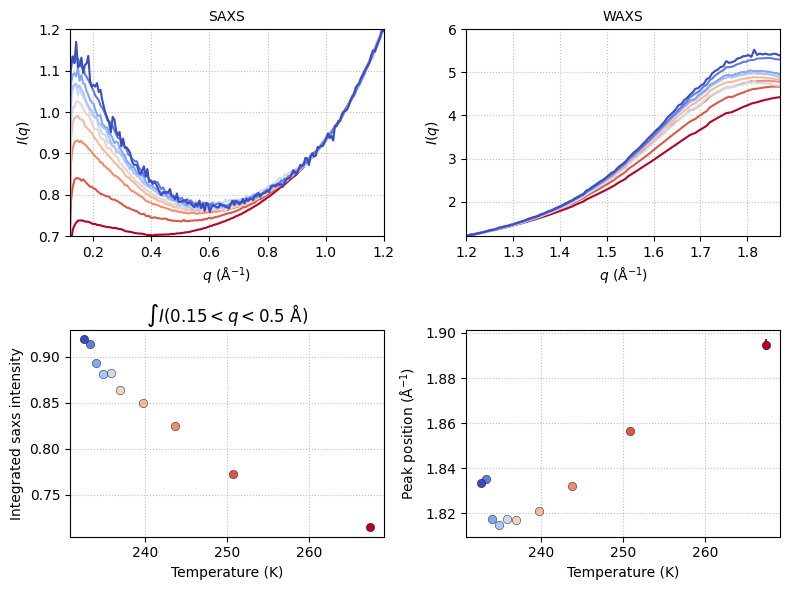

In [453]:
posz = [5,15,26,35,45,50,55,60,65,70]#,10,15,20,25,30,35,40]
temperature=[267.37, 250.78969563,243.72530823, 239.7588108,  236.99110816,235.89202105, 234.93547104,234.08555584,233.32,232.633]

#65.0	233.32218870531557
#70.0	232.63304923913267
#75.0	232.00617620267658
#80.0	231.43221641175697
# these are the runs with another droplet size
runs = [[1192503,1192504], # 5
        [1192506,1192507,1192508], # 15
        [1192510,1192511,1192512], # 26  
        [1192514,1192515,1192516,1192517,1192518], # 35  
        [1192520,1192521,1192522,1192523,1192524,1192525], # 45 
        [1192527,1192528,1192529,1192530,1192532,1192533],#50
        [1192536,1192539,1192541,1192542,1192543,1192544,1192545,1192546],#55 (1192537, 1192538,1192540 do not have anyhits)
           [1192558,1192559,1192560,1192561,1192562,1192563,1192564,1192565], ##60
        [1192567,1192568,1192569,1192570,1192571,1192572,1192573],##65
        [1192578,1192579,1192580,1192581,],##70
       ]


fig, ((a1,a2),(a3,a4)) = plt.subplots(2,2,figsize=(8,6), tight_layout=True)
col = plt.cm.coolwarm_r(np.linspace(0,1,len(runs)))


dIqs = []
Iqs = []
qs = []
I_qs0=[]
i_norm=np.zeros(len(runs))
di_norm=np.zeros(len(runs))
qmax=np.zeros(len(runs))


for i in range(len(runs)):
    Iq_tmp = []
    tmp = []
    for j in range(len(runs[i])):
        file = np.load(f'{path}water_{runs[i][j]}.npz')
        Iq_tmp.append(file['I'])
        tmp.append(file['hit_rate']*100)
    qs.append(file['q'])
    Iqs.append(np.average(Iq_tmp, axis=0))
    dIqs.append(np.std(Iq_tmp, axis=0)/np.sqrt(np.size(Iq_tmp,0)))
    
    norm=(np.mean(Iqs[i][(file['q']>.9)&(file['q']<1.2)]))
    I_qs0= Iqs[i]/norm
    
    i_norm[i]=np.mean(I_qs0[10:68])
    di_norm[i]=np.sqrt(np.sum(np.array(dIqs[i][10:68])**2))/norm
    popt,xc,curve,perr = fit(gaussian, qs[i][xmin:xmax], Iqs[i][xmin:xmax]/norm, p0=[350,1.8,.3, 50])
    qmax[i]=popt[1]
    
    a1.plot(qs[i][:-1],I_qs0[:-1], c=col[i], label=temperature[i],ls='-',fillstyle='none',ms=3,)
    a1.plot(qs[i][xmin:xmax],curve,c=col[i])
    
    a2.plot(qs[i][8:-1],I_qs0[8:-1], c=col[i], label=temperature[i],ls='-',fillstyle='none',)
    
    #a2.errorbar(temperature[i], np.average(tmp, axis=0), np.std(tmp),marker='o',c=col[i], markeredgecolor='k', markeredgewidth=.3)
    
    a3.plot(temperature[i],i_norm[i], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    
    a4.errorbar(temperature[i], popt[1], perr[1], c=col[i], marker='o', markeredgecolor='k', markeredgewidth=.3, ls='')
    

    
#for ref in [1.6129, 1.71, 1.82]:
#    a1.axvline(x=ref, ls='--', c='k', alpha=0.7, lw=1)    
a2.axvline(x=.13, ls='--', c='k', alpha=0.7, lw=1)    
        
a2.set_xlim(1.2,1.87)

a2.set_ylim(1.2,6)

a1.grid(ls=':',alpha=.9)
#legend=a1.legend(handlelength=1, fontsize=9)
#legend.set_title('distance (mm)',prop={'size':9})
# a1.setp(legend.get_title(),fontsize=8)

a1.set_ylabel(r'$I(q)$')
a1.set_xlabel(r'$q$ $\rm (\AA^{-1})$') 
a1.set_title('SAXS', fontsize=10)
a1.grid(ls=':',alpha=.8)


a2.set_title('WAXS', fontsize=10)

a2.set_xlabel('Temperature (K)')
a2.set_ylabel('hit rate %')
a2.set_ylabel(r'$I(q)$')
a2.set_xlabel(r'$q$ $\rm (\AA^{-1})$') 
a2.grid(ls=':',alpha=.8)

a1.set_xlim(.12,1.2)

a1.set_ylim(.7,1.2)

a3.set_ylabel('Integrated saxs intensity')
a3.set_xlabel('Temperature (K)')
a3.set_title(r'$\int I(0.15<q<0.5$ $\rm \AA)$')
a3.grid(ls=':',alpha=.8)

a4.set_ylabel(r'Peak position $\rm (\AA^{-1})$') 
a4.set_xlabel('Temperature (K)')
a4.grid(ls=':',alpha=.8)





In [440]:
derivative= np.zeros(len(qmax-2))
for i in range(len(qmax)-1):
    derivative[i]=(qmax[i]-qmax[i+1])/(temperature[i]-temperature[i+1])

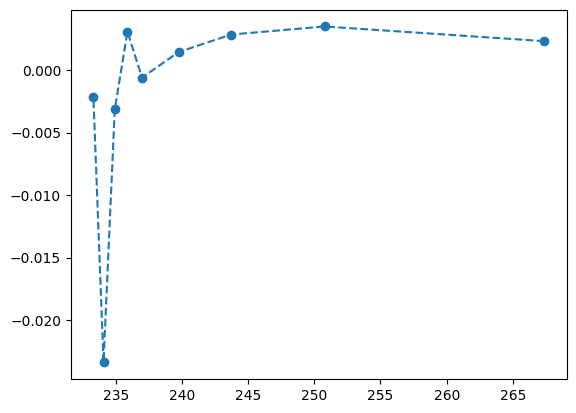

In [441]:
plt.figure()
plt.plot(temperature[:-1],derivative[:-1],'o',ls='--')

In [438]:
file['q'][-3]

1.8746722104839928